# Scientific Computing with SciPy

SciPy extends NumPy with additional scientific computing capabilities, providing modules for optimization, integration, interpolation, signal processing, and more.


## Setup and Overview

In [15]:


import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats, optimize, integrate, interpolate, signal, ndimage, sparse
from scipy.sparse import csr_matrix
from scipy.sparse.linalg import spsolve

# Set style
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (10, 6)

print("SciPy version:", __import__('scipy').__version__)
print("\nAvailable SciPy modules:")
modules = ['cluster', 'constants', 'fft', 'integrate', 'interpolate', 'io', 'linalg',
           'misc', 'ndimage', 'odr', 'optimize', 'signal', 'sparse', 'spatial', 'special', 'stats']
for module in modules:
    print(f"- scipy.{module}")

SciPy version: 1.15.3

Available SciPy modules:
- scipy.cluster
- scipy.constants
- scipy.fft
- scipy.integrate
- scipy.interpolate
- scipy.io
- scipy.linalg
- scipy.misc
- scipy.ndimage
- scipy.odr
- scipy.optimize
- scipy.signal
- scipy.sparse
- scipy.spatial
- scipy.special
- scipy.stats


## Statistical Functions and Distributions

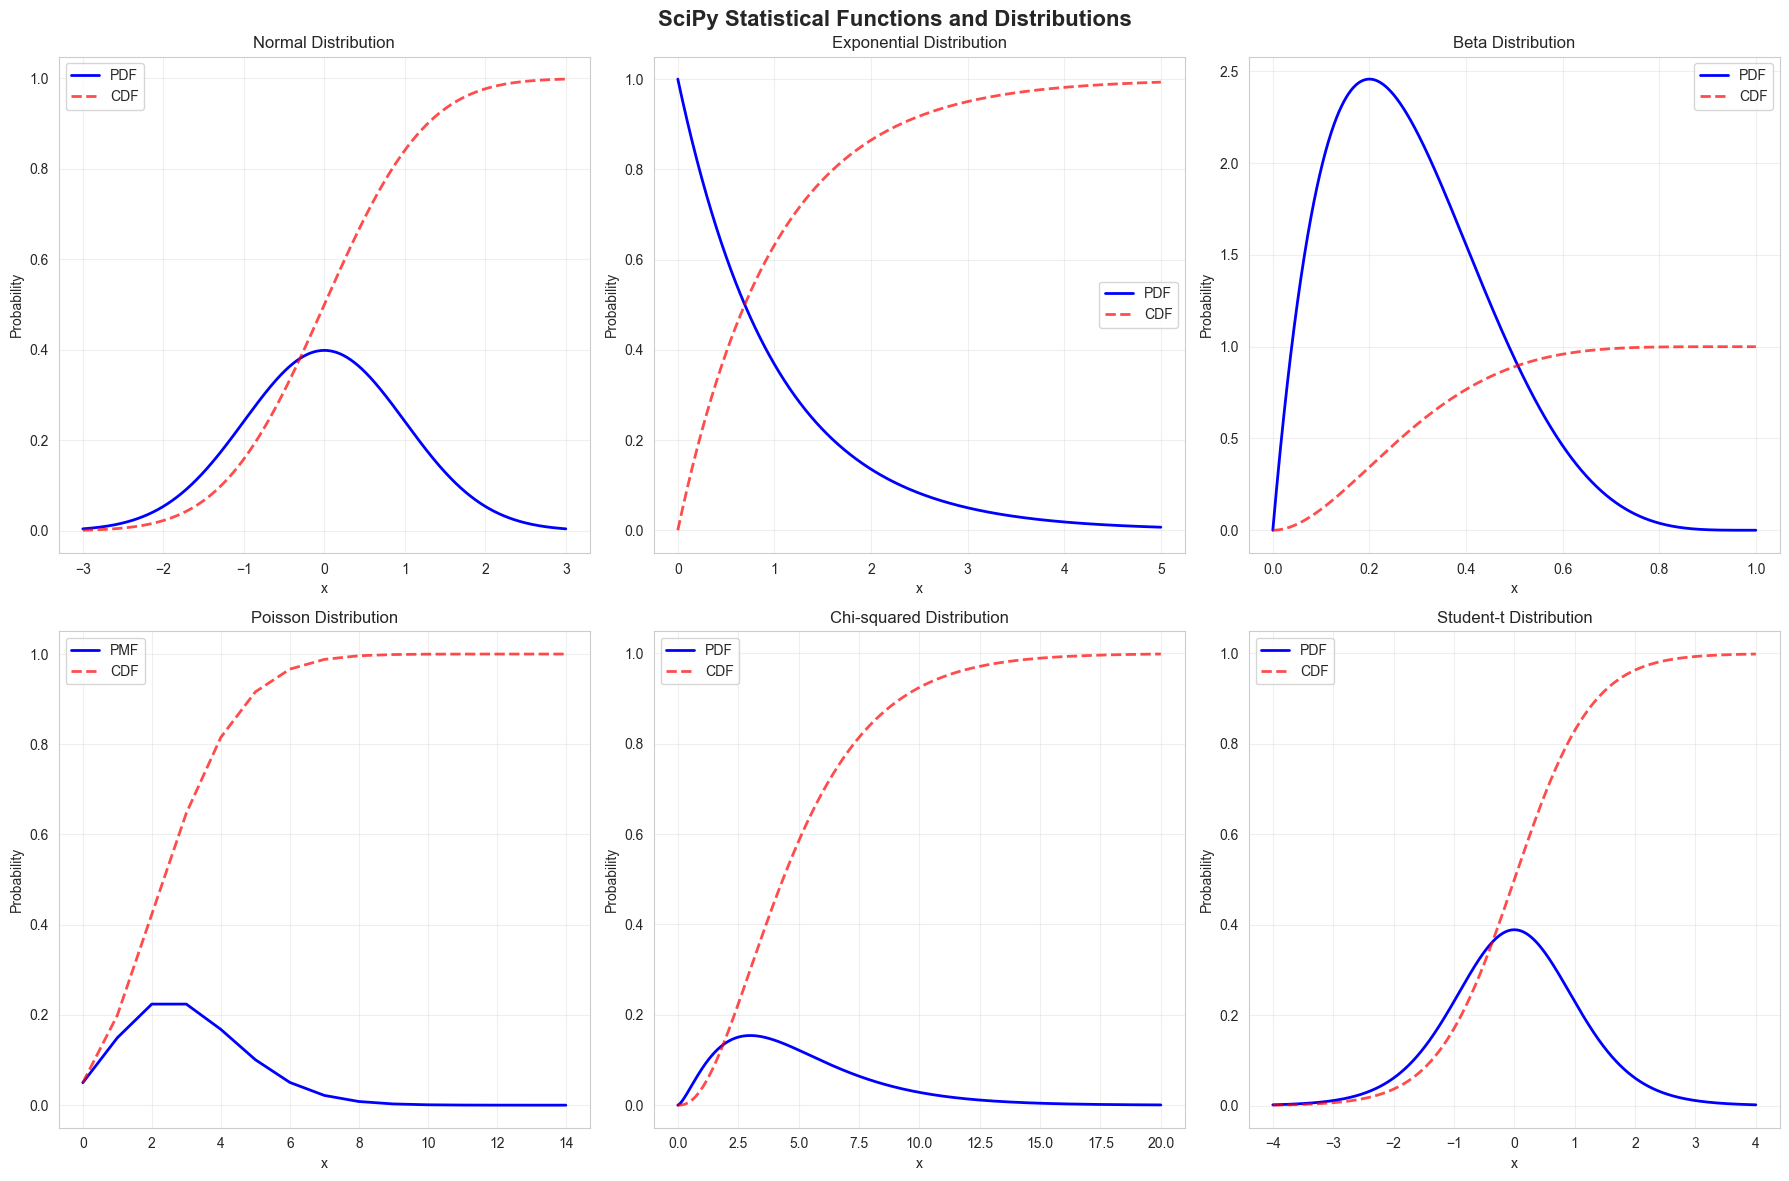


Statistical Tests and Functions
Sample 1 statistics:
  Mean: -0.104
  Std: 0.908
  Skewness: -0.175
  Kurtosis: -0.155

Sample 2 statistics:
  Mean: 0.527
  Std: 1.144
  Skewness: 0.381
  Kurtosis: -0.030

T-test (independent samples): t=-4.316, p=0.000

Shapiro-Wilk normality test:
  Sample 1: statistic=0.990, p=0.655
  Sample 2: statistic=0.978, p=0.085

Correlation tests:
  Pearson: r=-0.136, p=0.176
  Spearman: r=-0.108, p=0.285

95% Confidence intervals:
  Sample 1: (-0.284, 0.076)
  Sample 2: (0.300, 0.754)


In [16]:

# Statistical distributions and functions
fig, axes = plt.subplots(2, 3, figsize=(18, 12))
fig.suptitle('SciPy Statistical Functions and Distributions', fontsize=16, fontweight='bold')

# Common distributions
distributions = [
    ('Normal', stats.norm, {'loc': 0, 'scale': 1}),
    ('Exponential', stats.expon, {'scale': 1}),
    ('Beta', stats.beta, {'a': 2, 'b': 5}),
    ('Poisson', stats.poisson, {'mu': 3}),
    ('Chi-squared', stats.chi2, {'df': 5}),
    ('Student-t', stats.t, {'df': 10})
]

x_ranges = [
    np.linspace(-3, 3, 1000),  # Normal
    np.linspace(0, 5, 1000),   # Exponential
    np.linspace(0, 1, 1000),   # Beta
    np.arange(0, 15),          # Poisson
    np.linspace(0, 20, 1000),  # Chi-squared
    np.linspace(-4, 4, 1000)   # Student-t
]

for i, (name, dist, params) in enumerate(distributions):
    plt.subplot(2, 3, i+1)

    x = x_ranges[i]

    # Use PDF for continuous distributions, PMF for discrete
    if hasattr(dist, 'pdf'):
        pdf = dist.pdf(x, **params)
        plt.plot(x, pdf, 'b-', linewidth=2, label='PDF')
    elif hasattr(dist, 'pmf'):
        pmf = dist.pmf(x, **params)
        plt.plot(x, pmf, 'b-', linewidth=2, label='PMF')

    # Add CDF for continuous distributions
    if hasattr(dist, 'cdf'):
        cdf = dist.cdf(x, **params)
        plt.plot(x, cdf, 'r--', linewidth=2, label='CDF', alpha=0.7)

    plt.title(f'{name} Distribution')
    plt.xlabel('x')
    plt.ylabel('Probability')
    plt.legend()
    plt.grid(True, alpha=0.3)
    plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Statistical tests and functions
print("\nStatistical Tests and Functions")
print("=" * 35)

# Generate sample data
np.random.seed(42)
sample1 = np.random.normal(0, 1, 100)
sample2 = np.random.normal(0.5, 1.2, 100)

# Basic statistics
print("Sample 1 statistics:")
print(f"  Mean: {np.mean(sample1):.3f}")
print(f"  Std: {np.std(sample1, ddof=1):.3f}")
print(f"  Skewness: {stats.skew(sample1):.3f}")
print(f"  Kurtosis: {stats.kurtosis(sample1):.3f}")

print("\nSample 2 statistics:")
print(f"  Mean: {np.mean(sample2):.3f}")
print(f"  Std: {np.std(sample2, ddof=1):.3f}")
print(f"  Skewness: {stats.skew(sample2):.3f}")
print(f"  Kurtosis: {stats.kurtosis(sample2):.3f}")

# Hypothesis tests
t_stat, p_value = stats.ttest_ind(sample1, sample2)
print(f"\nT-test (independent samples): t={t_stat:.3f}, p={p_value:.3f}")

# Normality test
stat1, p1 = stats.shapiro(sample1)
stat2, p2 = stats.shapiro(sample2)
print(f"\nShapiro-Wilk normality test:")
print(f"  Sample 1: statistic={stat1:.3f}, p={p1:.3f}")
print(f"  Sample 2: statistic={stat2:.3f}, p={p2:.3f}")

# Correlation tests
corr_pearson, p_pearson = stats.pearsonr(sample1, sample2)
corr_spearman, p_spearman = stats.spearmanr(sample1, sample2)
print(f"\nCorrelation tests:")
print(f"  Pearson: r={corr_pearson:.3f}, p={p_pearson:.3f}")
print(f"  Spearman: r={corr_spearman:.3f}, p={p_spearman:.3f}")

# Confidence intervals
mean1, std1 = np.mean(sample1), stats.sem(sample1)
ci1 = stats.t.interval(0.95, len(sample1)-1, mean1, std1)
print(f"\n95% Confidence intervals:")
print(f"  Sample 1: ({ci1[0]:.3f}, {ci1[1]:.3f})")

mean2, std2 = np.mean(sample2), stats.sem(sample2)
ci2 = stats.t.interval(0.95, len(sample2)-1, mean2, std2)
print(f"  Sample 2: ({ci2[0]:.3f}, {ci2[1]:.3f})")



## Optimization

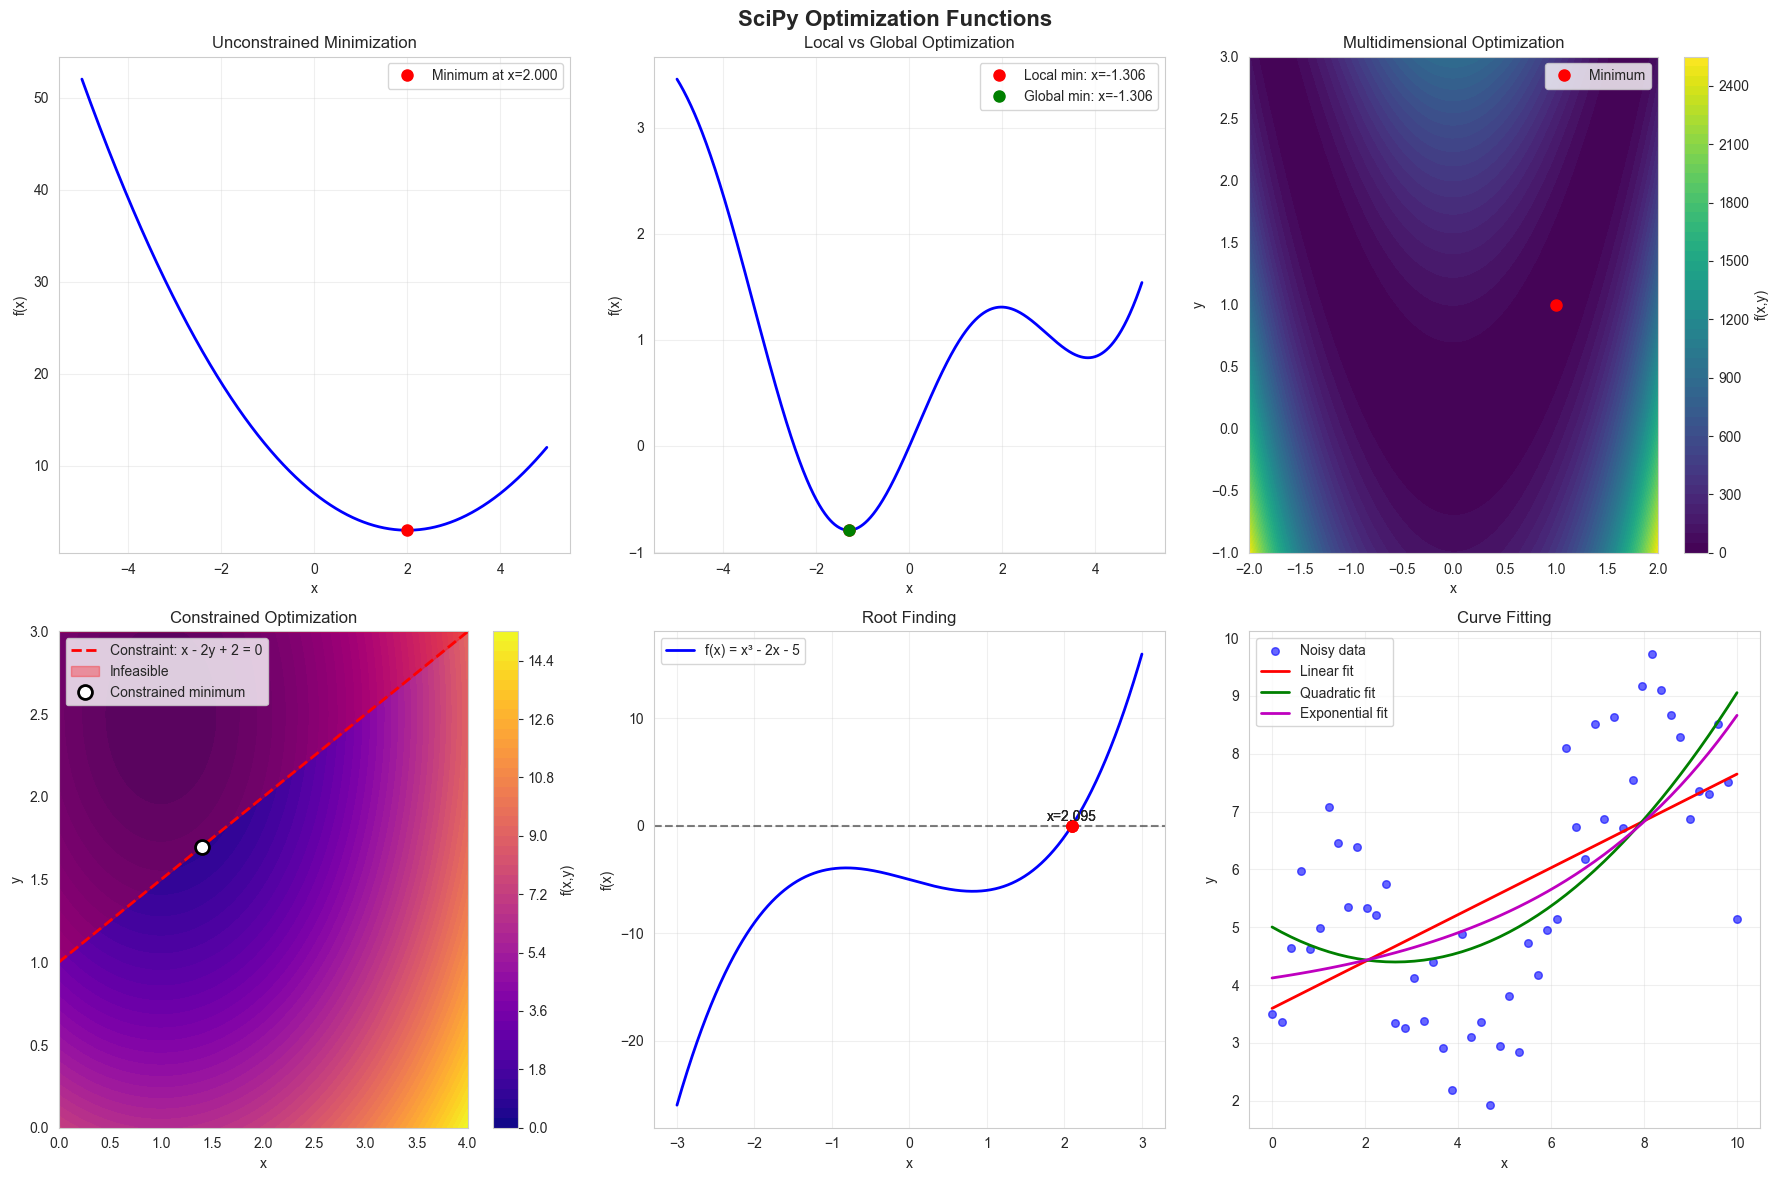


Optimization Results:
Unconstrained minimum: x = 2.000, f(x) = 3.000
Global minimum: x = -1.306, f(x) = -0.795
Multidimensional minimum: x = [0.99999467 0.99998932], f(x,y) = 0.000
Constrained minimum: x = [1.39999999 1.69999999], f(x,y) = 0.800
Roots found: [np.float64(2.094551481542306), np.float64(2.094551481542327), np.float64(2.0945514815423265)]


In [17]:



# Optimization functions
fig, axes = plt.subplots(2, 3, figsize=(18, 12))
fig.suptitle('SciPy Optimization Functions', fontsize=16, fontweight='bold')

# Function to minimize: f(x) = (x-2)^2 + 3
def quadratic(x):
    return (x - 2)**2 + 3

# Function with multiple minima: f(x) = sin(x) + 0.1*x^2
def multimodal(x):
    return np.sin(x) + 0.1 * x**2

# Rosenbrock function: f(x,y) = (1-x)^2 + 100*(y-x^2)^2
def rosenbrock(xy):
    x, y = xy
    return (1 - x)**2 + 100 * (y - x**2)**2

# Optimization examples
x_range = np.linspace(-5, 5, 1000)

# 1. Unconstrained minimization
plt.subplot(2, 3, 1)
plt.plot(x_range, quadratic(x_range), 'b-', linewidth=2)
result_min = optimize.minimize_scalar(quadratic, bounds=(-5, 5), method='bounded')
plt.plot(result_min.x, result_min.fun, 'ro', markersize=8, label=f'Minimum at x={result_min.x:.3f}')
plt.title('Unconstrained Minimization')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.legend()
plt.grid(True, alpha=0.3)

# 2. Local vs Global optimization
plt.subplot(2, 3, 2)
plt.plot(x_range, multimodal(x_range), 'b-', linewidth=2)

# Local minimum
result_local = optimize.minimize_scalar(multimodal, bounds=(-5, 5), method='bounded')
plt.plot(result_local.x, result_local.fun, 'ro', markersize=8, label=f'Local min: x={result_local.x:.3f}')

# Global minimum (using basinhopping)
result_global = optimize.basinhopping(multimodal, x0=0, niter=100)
plt.plot(result_global.x, result_global.fun, 'go', markersize=8, label=f'Global min: x={result_global.x[0]:.3f}')

plt.title('Local vs Global Optimization')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.legend()
plt.grid(True, alpha=0.3)

# 3. Multidimensional optimization
plt.subplot(2, 3, 3)
x = np.linspace(-2, 2, 100)
y = np.linspace(-1, 3, 100)
X, Y = np.meshgrid(x, y)
Z = rosenbrock([X, Y])

plt.contourf(X, Y, Z, levels=50, cmap='viridis')
plt.colorbar(label='f(x,y)')

# Find minimum
result_multi = optimize.minimize(rosenbrock, x0=[0, 0], method='BFGS')
plt.plot(result_multi.x[0], result_multi.x[1], 'ro', markersize=8, label='Minimum')
plt.title('Multidimensional Optimization')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.grid(True, alpha=0.3)

# 4. Constrained optimization
plt.subplot(2, 3, 4)

def objective(x):
    return (x[0] - 1)**2 + (x[1] - 2.5)**2

def constraint(x):
    return x[0] - 2*x[1] + 2  # x - 2y + 2 >= 0

x_opt = np.linspace(0, 4, 100)
y_opt = np.linspace(0, 3, 100)
X_opt, Y_opt = np.meshgrid(x_opt, y_opt)
Z_opt = objective([X_opt, Y_opt])

plt.contourf(X_opt, Y_opt, Z_opt, levels=50, cmap='plasma')
plt.colorbar(label='f(x,y)')

# Constraint boundary
y_constraint = (x_opt + 2) / 2
plt.plot(x_opt, y_constraint, 'r--', linewidth=2, label='Constraint: x - 2y + 2 = 0')

# Feasible region
plt.fill_between(x_opt, y_constraint, 3, alpha=0.3, color='red', label='Infeasible')

# Constrained minimum
cons = {'type': 'ineq', 'fun': constraint}
result_cons = optimize.minimize(objective, x0=[0, 0], constraints=cons, method='SLSQP')
plt.plot(result_cons.x[0], result_cons.x[1], 'wo', markersize=10, markeredgecolor='black',
         markeredgewidth=2, label='Constrained minimum')

plt.title('Constrained Optimization')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.grid(True, alpha=0.3)

# 5. Root finding
plt.subplot(2, 3, 5)

def equation(x):
    return x**3 - 2*x - 5

x_root = np.linspace(-3, 3, 1000)
y_root = equation(x_root)

plt.plot(x_root, y_root, 'b-', linewidth=2, label='f(x) = x³ - 2x - 5')
plt.axhline(y=0, color='black', linestyle='--', alpha=0.5)

# Find roots
roots = []
for guess in [-2, 0, 2]:
    try:
        root = optimize.root_scalar(equation, x0=guess-0.1, x1=guess+0.1)
        if root.converged:
            roots.append(root.root)
    except:
        pass

for root in roots:
    plt.plot(root, 0, 'ro', markersize=8)
    plt.annotate(f'x={root:.3f}', xy=(root, 0.5), ha='center')

plt.title('Root Finding')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.legend()
plt.grid(True, alpha=0.3)

# 6. Curve fitting
plt.subplot(2, 3, 6)

# Generate noisy data
np.random.seed(42)
x_fit = np.linspace(0, 10, 50)
y_true = 2 * np.sin(x_fit) + 0.5 * x_fit + 3
y_noisy = y_true + np.random.normal(0, 1, len(x_fit))

# Fit different models
def linear_model(x, a, b):
    return a * x + b

def quadratic_model(x, a, b, c):
    return a * x**2 + b * x + c

def exponential_model(x, a, b, c):
    return a * np.exp(b * x) + c

# Perform fits
popt_linear, _ = optimize.curve_fit(linear_model, x_fit, y_noisy)
popt_quad, _ = optimize.curve_fit(quadratic_model, x_fit, y_noisy)
popt_exp, _ = optimize.curve_fit(exponential_model, x_fit, y_noisy, p0=[1, -0.1, 1])

# Plot results
plt.scatter(x_fit, y_noisy, alpha=0.6, color='blue', s=30, label='Noisy data')
plt.plot(x_fit, linear_model(x_fit, *popt_linear), 'r-', linewidth=2, label='Linear fit')
plt.plot(x_fit, quadratic_model(x_fit, *popt_quad), 'g-', linewidth=2, label='Quadratic fit')
plt.plot(x_fit, exponential_model(x_fit, *popt_exp), 'm-', linewidth=2, label='Exponential fit')

plt.title('Curve Fitting')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print("\nOptimization Results:")
print("=" * 20)
print(f"Unconstrained minimum: x = {result_min.x:.3f}, f(x) = {result_min.fun:.3f}")
print(f"Global minimum: x = {result_global.x[0]:.3f}, f(x) = {result_global.fun:.3f}")
print(f"Multidimensional minimum: x = {result_multi.x}, f(x,y) = {result_multi.fun:.3f}")
print(f"Constrained minimum: x = {result_cons.x}, f(x,y) = {result_cons.fun:.3f}")
print(f"Roots found: {roots}")




## Integration and Differentiation

Definite integral from 0 to 10: 1.084886 (error: 2.69e-12)
Double integral: 0.666667 (error: 1.48e-14)


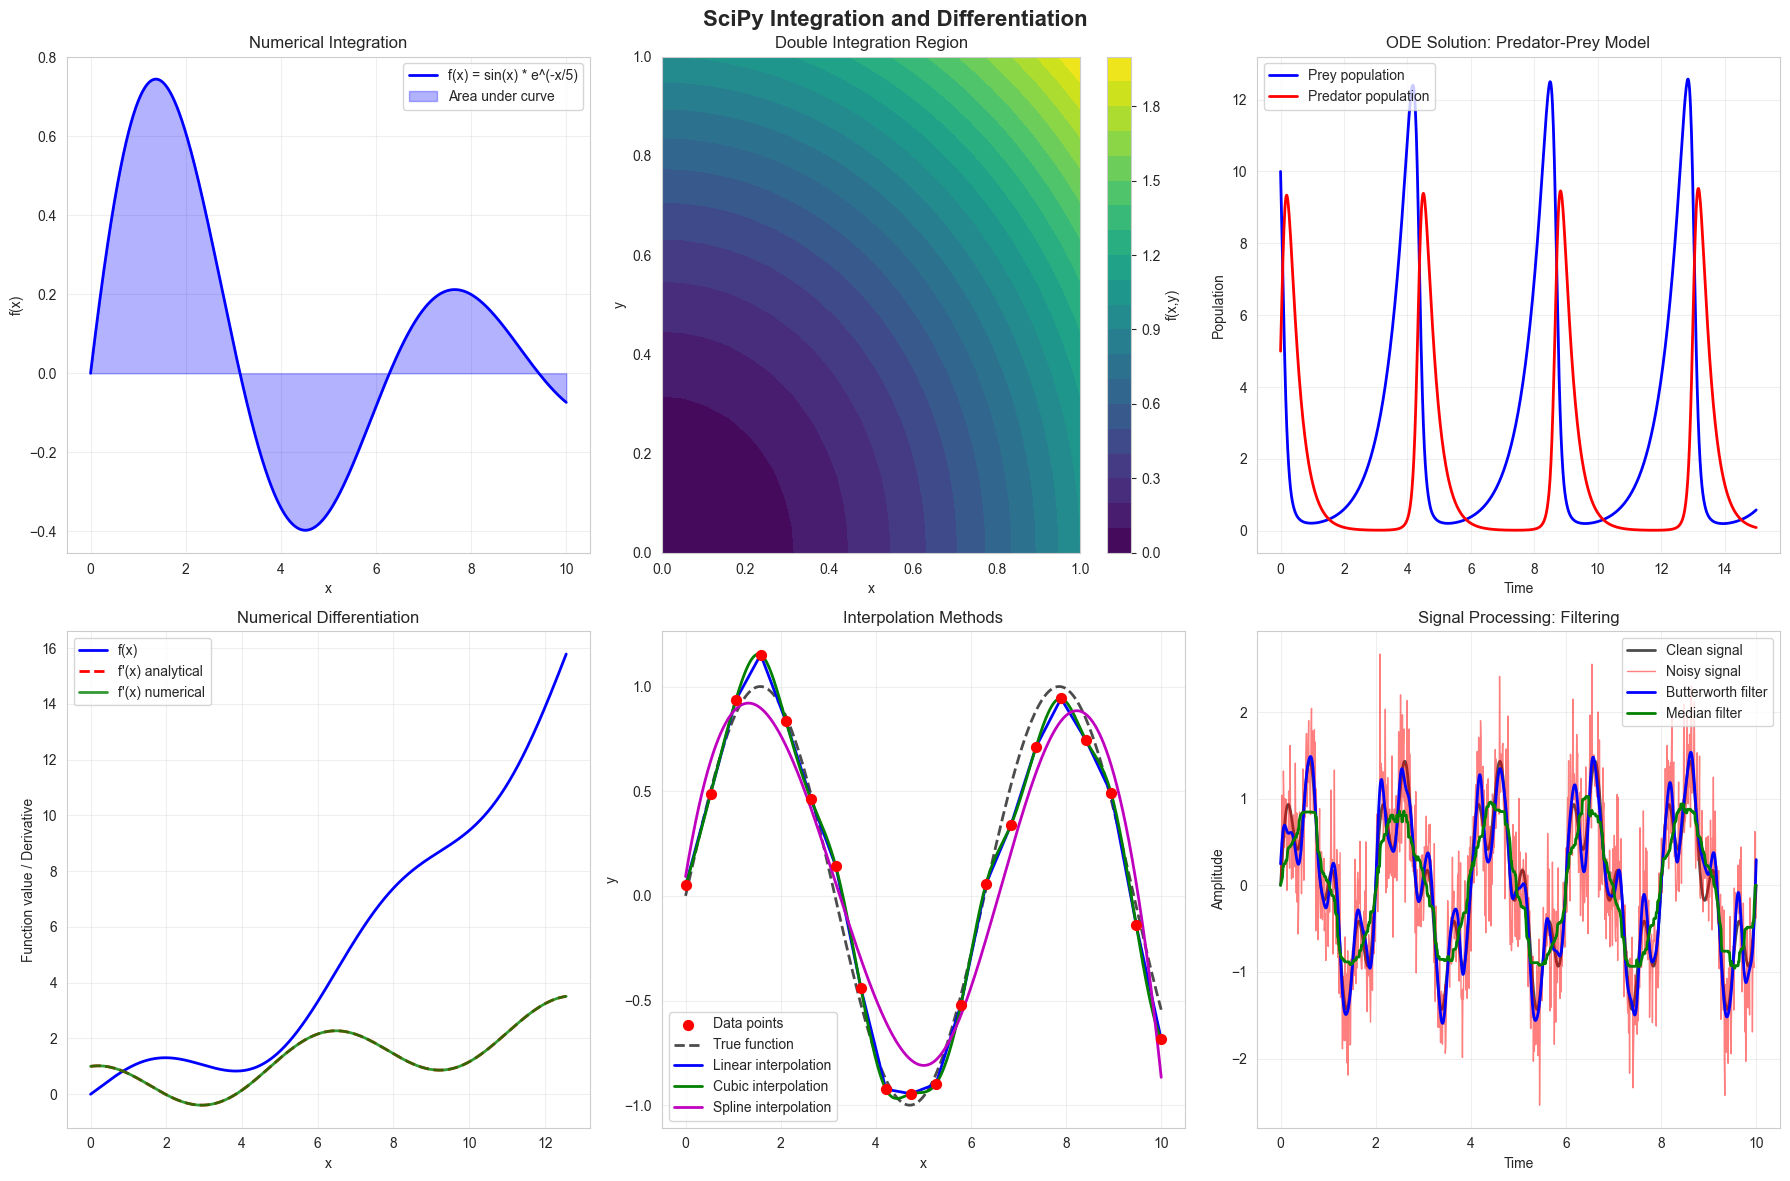


Integration and Differentiation Results:
Numerical integration result: 1.084886
Double integration result: 0.666667
ODE solution points: 1000
Interpolation methods compared: Linear, Cubic, Spline


In [18]:



# Integration and differentiation
fig, axes = plt.subplots(2, 3, figsize=(18, 12))
fig.suptitle('SciPy Integration and Differentiation', fontsize=16, fontweight='bold')

# 1. Numerical integration
plt.subplot(2, 3, 1)

def integrand(x):
    return np.sin(x) * np.exp(-x/5)

x_int = np.linspace(0, 10, 1000)
y_int = integrand(x_int)

plt.plot(x_int, y_int, 'b-', linewidth=2, label='f(x) = sin(x) * e^(-x/5)')
plt.fill_between(x_int, y_int, alpha=0.3, color='blue', label='Area under curve')

# Calculate definite integral
result_quad = integrate.quad(integrand, 0, 10)
print(f"Definite integral from 0 to 10: {result_quad[0]:.6f} (error: {result_quad[1]:.2e})")

plt.title('Numerical Integration')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.legend()
plt.grid(True, alpha=0.3)

# 2. Multiple integration
plt.subplot(2, 3, 2)

def double_integrand(y, x):
    return x**2 + y**2

# Integrate ∫∫(x² + y²) dx dy over [0,1] x [0,1]
result_dblquad = integrate.dblquad(double_integrand, 0, 1, lambda x: 0, lambda x: 1)
print(f"Double integral: {result_dblquad[0]:.6f} (error: {result_dblquad[1]:.2e})")

# Visualize the region
x_2d = np.linspace(0, 1, 20)
y_2d = np.linspace(0, 1, 20)
X_2d, Y_2d = np.meshgrid(x_2d, y_2d)
Z_2d = double_integrand(Y_2d, X_2d)

plt.contourf(X_2d, Y_2d, Z_2d, levels=20, cmap='viridis')
plt.colorbar(label='f(x,y)')
plt.title('Double Integration Region')
plt.xlabel('x')
plt.ylabel('y')

# 3. Ordinary differential equations
plt.subplot(2, 3, 3)

def ode_system(t, y):
    """Lotka-Volterra equations (predator-prey model)"""
    x, y_prey = y
    alpha, beta, gamma, delta = 1.5, 1.0, 3.0, 1.0
    return [alpha * x - beta * x * y_prey,  # prey
            -gamma * y_prey + delta * x * y_prey]  # predator

# Solve ODE
t_span = (0, 15)
y0 = [10, 5]  # initial prey and predator populations
sol = integrate.solve_ivp(ode_system, t_span, y0, t_eval=np.linspace(0, 15, 1000))

plt.plot(sol.t, sol.y[0], 'b-', linewidth=2, label='Prey population')
plt.plot(sol.t, sol.y[1], 'r-', linewidth=2, label='Predator population')
plt.title('ODE Solution: Predator-Prey Model')
plt.xlabel('Time')
plt.ylabel('Population')
plt.legend()
plt.grid(True, alpha=0.3)

# 4. Numerical differentiation
plt.subplot(2, 3, 4)

def function(x):
    return np.sin(x) + 0.1 * x**2

x_diff = np.linspace(0, 4*np.pi, 1000)
y_diff = function(x_diff)

# Analytical derivative
y_analytical = np.cos(x_diff) + 0.2 * x_diff

# Numerical derivatives
dy_dx = np.gradient(y_diff, x_diff)  # First derivative
d2y_dx2 = np.gradient(dy_dx, x_diff)  # Second derivative

plt.plot(x_diff, y_diff, 'b-', linewidth=2, label='f(x)')
plt.plot(x_diff, y_analytical, 'r--', linewidth=2, label='f\'(x) analytical')
plt.plot(x_diff, dy_dx, 'g-', linewidth=2, label='f\'(x) numerical', alpha=0.8)
plt.title('Numerical Differentiation')
plt.xlabel('x')
plt.ylabel('Function value / Derivative')
plt.legend()
plt.grid(True, alpha=0.3)

# 5. Interpolation
plt.subplot(2, 3, 5)

# Generate data with noise
np.random.seed(42)
x_interp = np.linspace(0, 10, 20)
y_interp = np.sin(x_interp) + 0.1 * np.random.randn(len(x_interp))

# Interpolation points
x_fine = np.linspace(0, 10, 1000)

# Different interpolation methods
interp_linear = interpolate.interp1d(x_interp, y_interp, kind='linear')
interp_cubic = interpolate.interp1d(x_interp, y_interp, kind='cubic')
interp_spline = interpolate.UnivariateSpline(x_interp, y_interp, s=0.5)

plt.scatter(x_interp, y_interp, color='red', s=50, label='Data points', zorder=5)
plt.plot(x_fine, np.sin(x_fine), 'k--', linewidth=2, label='True function', alpha=0.7)
plt.plot(x_fine, interp_linear(x_fine), 'b-', linewidth=2, label='Linear interpolation')
plt.plot(x_fine, interp_cubic(x_fine), 'g-', linewidth=2, label='Cubic interpolation')
plt.plot(x_fine, interp_spline(x_fine), 'm-', linewidth=2, label='Spline interpolation')

plt.title('Interpolation Methods')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.grid(True, alpha=0.3)

# 6. Signal processing basics
plt.subplot(2, 3, 6)

# Create a signal with noise
np.random.seed(42)
t_signal = np.linspace(0, 10, 1000)
signal_clean = np.sin(2 * np.pi * 0.5 * t_signal) + 0.5 * np.sin(2 * np.pi * 2 * t_signal)
signal_noisy = signal_clean + 0.5 * np.random.randn(len(t_signal))

# Apply different filters
signal_filtered_butter = signal.filtfilt(*signal.butter(4, 0.1, 'low'), signal_noisy)
signal_filtered_median = signal.medfilt(signal_noisy, kernel_size=51)

plt.plot(t_signal, signal_clean, 'k-', linewidth=2, label='Clean signal', alpha=0.7)
plt.plot(t_signal, signal_noisy, 'r-', linewidth=1, label='Noisy signal', alpha=0.5)
plt.plot(t_signal, signal_filtered_butter, 'b-', linewidth=2, label='Butterworth filter')
plt.plot(t_signal, signal_filtered_median, 'g-', linewidth=2, label='Median filter')

plt.title('Signal Processing: Filtering')
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.legend()
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print("\nIntegration and Differentiation Results:")
print("=" * 40)
print(f"Numerical integration result: {result_quad[0]:.6f}")
print(f"Double integration result: {result_dblquad[0]:.6f}")
print(f"ODE solution points: {len(sol.t)}")
print(f"Interpolation methods compared: Linear, Cubic, Spline")




## Sparse Matrices and Linear Algebra

Sparse matrix shape: (100, 100)
Number of non-zero elements: 297
Sparsity: 97.0%
Size 100x100: Sparse=0.0002s, Dense=0.0007s, Speedup=4.2x
Size 500x500: Sparse=0.0002s, Dense=0.0071s, Speedup=30.2x
Size 1000x1000: Sparse=0.0006s, Dense=0.0244s, Speedup=38.2x
Size 2000x2000: Sparse=0.0010s, Dense=0.1208s, Speedup=123.7x


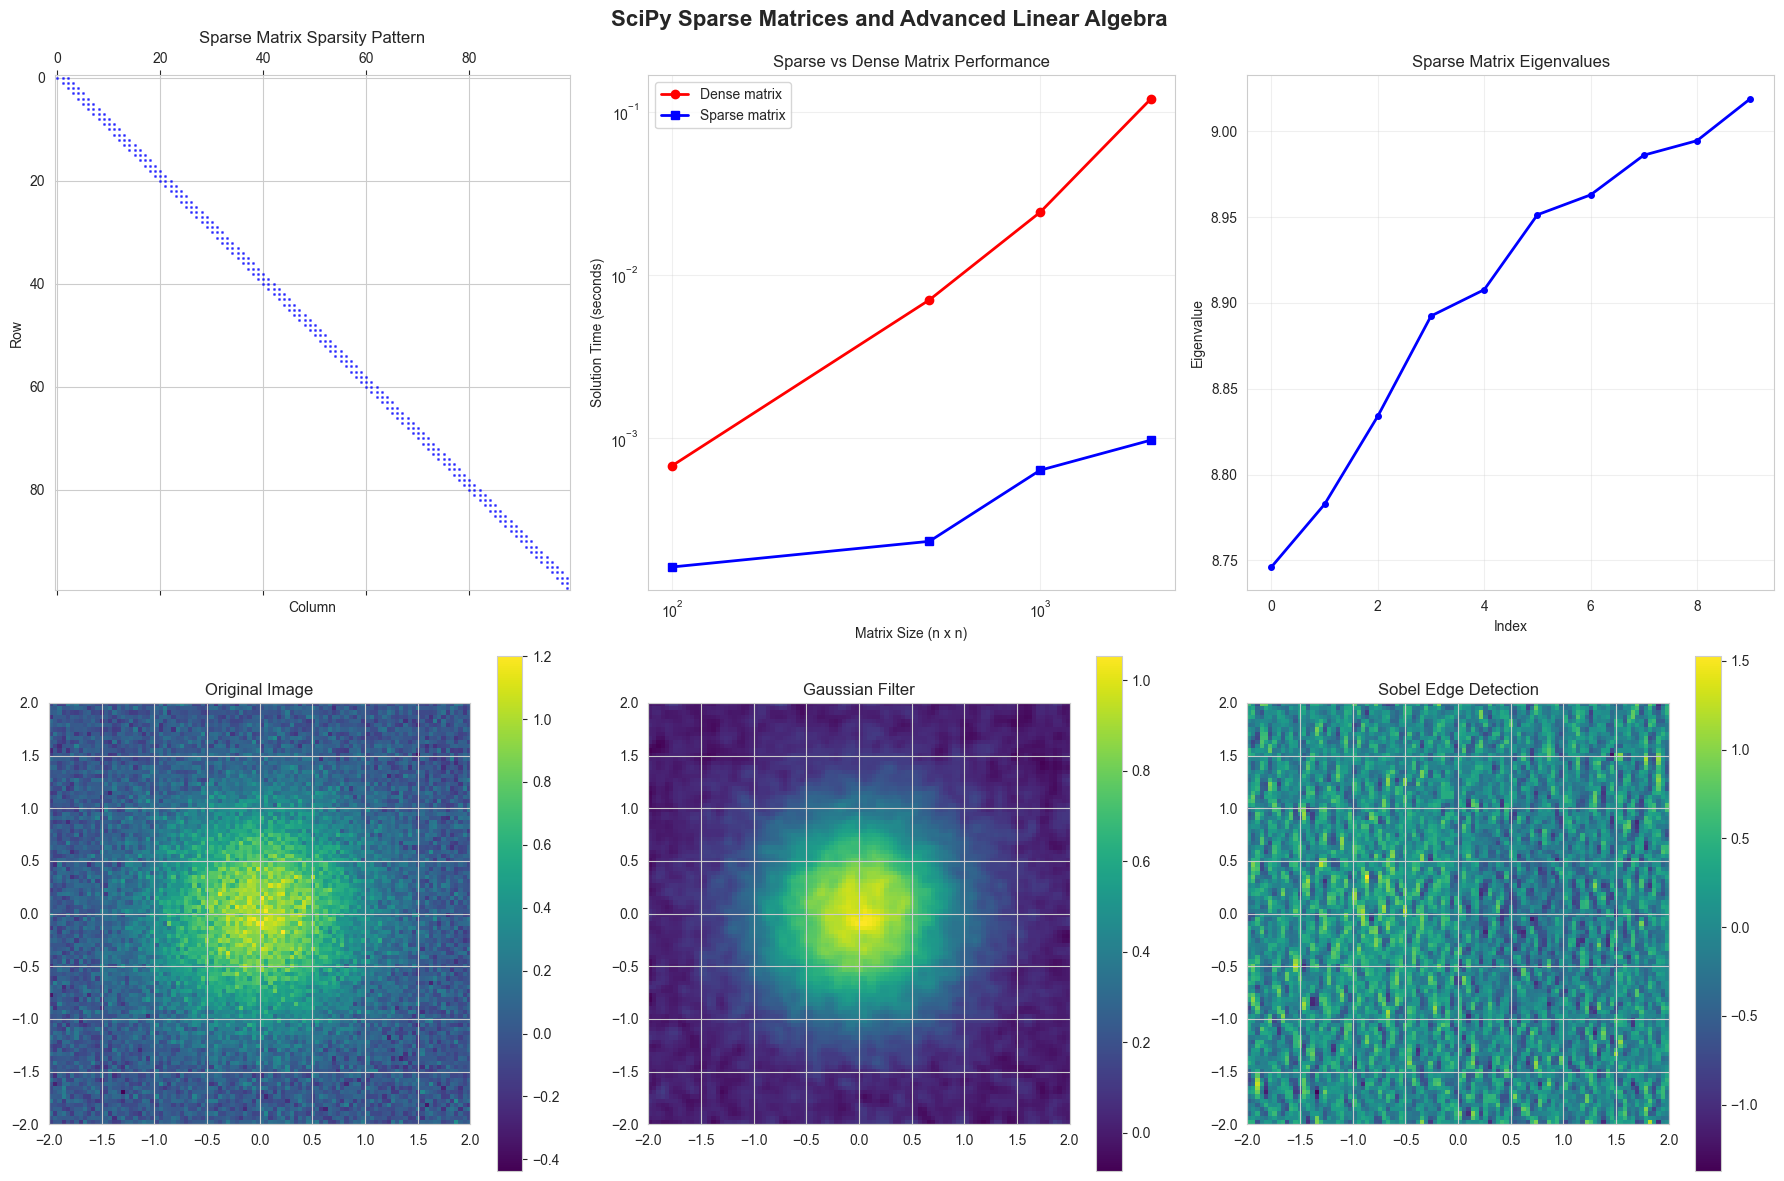

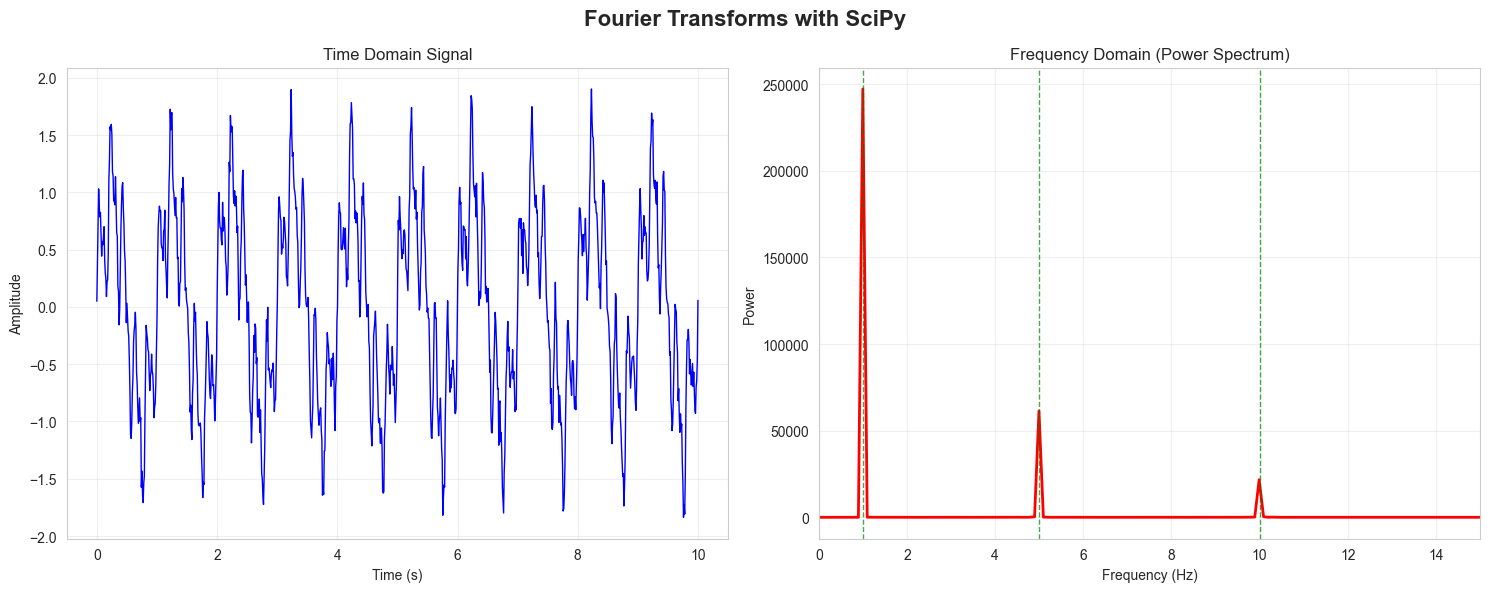


Sparse Matrix and Advanced Computing Results:
Sparse matrix sparsity: 99.9%
Largest speedup for sparse matrices: 123.7x
Number of eigenvalues computed: 10
FFT frequencies identified: 1Hz, 5Hz, 10Hz


In [19]:



# Sparse matrices and advanced linear algebra
fig, axes = plt.subplots(2, 3, figsize=(18, 12))
fig.suptitle('SciPy Sparse Matrices and Advanced Linear Algebra', fontsize=16, fontweight='bold')

# 1. Sparse matrix creation and visualization
plt.subplot(2, 3, 1)

# Create a sparse matrix (banded matrix)
n = 100
diagonals = [np.ones(n), -2*np.ones(n-1), np.ones(n-2)]
offsets = [0, 1, 2]
A_sparse = sparse.diags(diagonals, offsets, format='csr')

print(f"Sparse matrix shape: {A_sparse.shape}")
print(f"Number of non-zero elements: {A_sparse.nnz}")
print(f"Sparsity: {(1 - A_sparse.nnz / (n*n)) * 100:.1f}%")

# Visualize sparsity pattern
plt.spy(A_sparse, markersize=1, color='blue', alpha=0.6)
plt.title('Sparse Matrix Sparsity Pattern')
plt.xlabel('Column')
plt.ylabel('Row')

# 2. Sparse vs dense matrix operations
plt.subplot(2, 3, 2)

sizes = [100, 500, 1000, 2000]
sparse_times = []
dense_times = []

import time

for n in sizes:
    # Create sparse matrix
    diagonals = [np.ones(n), -2*np.ones(n-1), np.ones(n-2)]
    A_sparse = sparse.diags(diagonals, offsets, format='csr')

    # Create dense equivalent
    A_dense = A_sparse.toarray()

    # Create random vector
    b = np.random.randn(n)

    # Time sparse solve
    start = time.time()
    x_sparse = spsolve(A_sparse, b)
    sparse_time = time.time() - start

    # Time dense solve
    start = time.time()
    x_dense = np.linalg.solve(A_dense, b)
    dense_time = time.time() - start

    sparse_times.append(sparse_time)
    dense_times.append(dense_time)

    print(f"Size {n}x{n}: Sparse={sparse_time:.4f}s, Dense={dense_time:.4f}s, Speedup={dense_time/sparse_time:.1f}x")

plt.loglog(sizes, dense_times, 'ro-', linewidth=2, label='Dense matrix')
plt.loglog(sizes, sparse_times, 'bs-', linewidth=2, label='Sparse matrix')
plt.title('Sparse vs Dense Matrix Performance')
plt.xlabel('Matrix Size (n x n)')
plt.ylabel('Solution Time (seconds)')
plt.legend()
plt.grid(True, alpha=0.3)

# 3. Eigenvalue problems for sparse matrices
plt.subplot(2, 3, 3)

# Create a sparse symmetric matrix
n_eigen = 200
np.random.seed(42)
A_sym_sparse = sparse.random(n_eigen, n_eigen, density=0.01, format='csr')
A_sym_sparse = (A_sym_sparse + A_sym_sparse.T) / 2  # Make symmetric

# Add some diagonal dominance
A_sym_sparse.setdiag(A_sym_sparse.diagonal() + 10)

# Compute eigenvalues using sparse methods
from scipy.sparse.linalg import eigsh
eigenvals_sparse, eigenvecs_sparse = eigsh(A_sym_sparse, k=10, which='SM')  # Smallest magnitude

plt.plot(eigenvals_sparse, 'bo-', linewidth=2, markersize=4)
plt.title('Sparse Matrix Eigenvalues')
plt.xlabel('Index')
plt.ylabel('Eigenvalue')
plt.grid(True, alpha=0.3)

# 4. Image processing with ndimage
plt.subplot(2, 3, 4)

# Create a synthetic image
x_img = np.linspace(-2, 2, 100)
y_img = np.linspace(-2, 2, 100)
X_img, Y_img = np.meshgrid(x_img, y_img)
image = np.exp(-(X_img**2 + Y_img**2)) + 0.1 * np.random.randn(100, 100)

# Apply different filters
image_gaussian = ndimage.gaussian_filter(image, sigma=1)
image_median = ndimage.median_filter(image, size=5)
image_sobel = ndimage.sobel(image)

plt.subplot(2, 3, 4)
plt.imshow(image, cmap='viridis', extent=[-2, 2, -2, 2])
plt.title('Original Image')
plt.colorbar()

plt.subplot(2, 3, 5)
plt.imshow(image_gaussian, cmap='viridis', extent=[-2, 2, -2, 2])
plt.title('Gaussian Filter')
plt.colorbar()

plt.subplot(2, 3, 6)
plt.imshow(image_sobel, cmap='viridis', extent=[-2, 2, -2, 2])
plt.title('Sobel Edge Detection')
plt.colorbar()

plt.tight_layout()
plt.show()

# 5. Fourier transforms
fig, ax = plt.subplots(1, 2, figsize=(15, 6))
fig.suptitle('Fourier Transforms with SciPy', fontsize=16, fontweight='bold')

# Create a signal with multiple frequencies
np.random.seed(42)
t_fft = np.linspace(0, 10, 1000)
signal_fft = (np.sin(2 * np.pi * 1 * t_fft) +  # 1 Hz
              0.5 * np.sin(2 * np.pi * 5 * t_fft) +  # 5 Hz
              0.3 * np.sin(2 * np.pi * 10 * t_fft) +  # 10 Hz
              0.1 * np.random.randn(len(t_fft)))  # Noise

# Compute FFT
fft_result = np.fft.fft(signal_fft)
freqs = np.fft.fftfreq(len(t_fft), t_fft[1] - t_fft[0])
power_spectrum = np.abs(fft_result)**2

plt.subplot(1, 2, 1)
plt.plot(t_fft, signal_fft, 'b-', linewidth=1)
plt.title('Time Domain Signal')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.grid(True, alpha=0.3)

plt.subplot(1, 2, 2)
plt.plot(freqs[:len(freqs)//2], power_spectrum[:len(freqs)//2], 'r-', linewidth=2)
plt.title('Frequency Domain (Power Spectrum)')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Power')
plt.xlim(0, 15)
plt.grid(True, alpha=0.3)

# Mark the known frequencies
for freq in [1, 5, 10]:
    plt.axvline(x=freq, color='green', linestyle='--', alpha=0.7, linewidth=1)

plt.tight_layout()
plt.show()

print("\nSparse Matrix and Advanced Computing Results:")
print("=" * 50)
print(f"Sparse matrix sparsity: {(1 - A_sparse.nnz / (n*n)) * 100:.1f}%")
print(f"Largest speedup for sparse matrices: {max([dt/st for st, dt in zip(sparse_times, dense_times) if st > 0]):.1f}x")
print(f"Number of eigenvalues computed: {len(eigenvals_sparse)}")
print(f"FFT frequencies identified: 1Hz, 5Hz, 10Hz")



## SciPy Summary

**Key Modules:**
- **scipy.stats**: Statistical distributions, tests, and functions
- **scipy.optimize**: Optimization, root finding, curve fitting
- **scipy.integrate**: Numerical integration, ODE solving
- **scipy.interpolate**: Interpolation and smoothing
- **scipy.signal**: Signal processing and filtering
- **scipy.sparse**: Sparse matrix operations
- **scipy.linalg**: Advanced linear algebra
- **scipy.ndimage**: Image processing
- **scipy.fft**: Fourier transforms

**Main Applications:**
- **Scientific Computing**: Advanced mathematical computations
- **Data Analysis**: Statistical testing and modeling
- **Signal Processing**: Filtering, transforms, analysis
- **Image Processing**: Filtering, morphology, segmentation
- **Optimization**: Parameter estimation, model fitting
- **Numerical Methods**: Integration, differentiation, root finding

**Best Practices:**
1. Use appropriate data structures (sparse vs dense matrices)
2. Choose suitable optimization methods for your problem type
3. Validate numerical results with analytical solutions when possible
4. Consider computational complexity and memory usage
5. Use vectorized operations for performance
6. Handle numerical precision and stability issues

**Integration with Other Libraries:**
- Extends NumPy with additional functionality
- Works seamlessly with pandas and matplotlib
- Foundation for scikit-learn and other ML libraries
- Essential for scientific Python ecosystem

Next: Plotly for Interactive Visualizations</content>
<parameter name="filePath">/Users/drahmetacik/Projects/python-data-science-tutorial/notebooks/scipy_tutorial.ipynb